In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
from scipy.io import loadmat
from pathlib import Path
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import matplotlib
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_rel
from scipy.signal import butter, filtfilt
import mne
import eeg_analysis.funcs4eeg as fe
import re
import imp
import ast
import behavior.func4behav as fb
imp.reload(fe)
imp.reload(fb)

<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tACS-Attention\\processing\\behavior\\func4behav.py'>

In [2]:
case = 'exo invalid'
watch = '11 stim'
tmin = -0.1
tmax = 0.5

baseline_watch = '11 stim'
baseline_tmin = -0.1
baseline_tmax = 0
# baseline_watch = '1 fixation'
# baseline_tmin = 1
# baseline_tmax = 1.5
real_ids = [1, 3, 4, 5, 9, 12, 13, 17, 18]
sham_ids = [2, 6, 7, 8, 10, 11, 14, 15, 16]

highpass = None
lowpass = 30

behav_sham_before, behav_sham_after, behav_real_before, behav_real_after, _, _ = fe.reaction_time_table(case)
sham_evoked_before, sham_evoked_after, real_evoked_before, real_evoked_after, _, _ = fe.pipeline_EP_allsubs(case, watch, tmin, tmax, hipass=highpass, lopass=lowpass, baseline=(0,0), detrend=1)
sham_before_baseline, sham_after_baseline, real_before_baseline, real_after_baseline, _, _ = fe.pipeline_EP_allsubs(case, baseline_watch, baseline_tmin, baseline_tmax, hipass=highpass, lopass=lowpass, baseline=(0,0), detrend=1)

c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tACS-Attention\processing\behavior\func4behav.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  behavior_compare = pd.concat([behavior_compare, new_row], ignore_index=True)
c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tACS-Attention\processing\behavior\func4behav.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  behavior_compare = pd.concat([behavio

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (0.441 s)



KeyboardInterrupt: 

In [ ]:
# # move the baseline to mean of [-0.1, 0]
# evoke_list = [sham_evoked_before, sham_evoked_after, real_evoked_before, real_evoked_after]
# baseline_list = [sham_before_baseline, sham_after_baseline, real_before_baseline, real_after_baseline]
# data_list = [[],[],[],[]]
# for i, session_data in enumerate(evoke_list):
#     for j, sub_data in enumerate(session_data):
#         baseline = baseline_list[i][j]
#         for trial in range(sub_data.shape[0]):
#             for channel in range (sub_data.shape[1]):
#                 for time_step in range (sub_data.shape[2]):
#                     sub_data[trial, channel, :] = sub_data[trial, channel, :] - np.mean(baseline[trial, channel, :])
#         data_list[i].append(sub_data)

In [ ]:
# re-reference to average and pre/post multiplier
prestim_multiplier = 2
poststim_multiplier = np.linspace(3, 1, 240)
# evoke_list = [data_list[0], data_list[1], data_list[2], data_list[3]]
evoke_list = [sham_evoked_before, sham_evoked_after, real_evoked_before, real_evoked_after]

data_list = [[],[],[],[]]
for i, session_data in enumerate(evoke_list):
    for j, sub_data in enumerate(session_data):
        for trial in range(sub_data.shape[0]):
            # # prestim multiplier
            sub_data[trial, :, 0:120] = sub_data[trial, :, 0:120]/prestim_multiplier
            # re-referece
            for time_step in range (0, 120):#(sub_data.shape[2]):
                sub_data[trial, :, time_step] = sub_data[trial, :, time_step] - np.mean(sub_data[trial, :, time_step])
            # poststim multiplier
            for time_step in range (120,sub_data.shape[2]):
                sub_data[trial, :, time_step] = sub_data[trial, :, time_step]/poststim_multiplier[time_step-120]
        data_list[i].append(sub_data)

IndexError: index 240 is out of bounds for axis 0 with size 240

In [ ]:
# data_list = [sham_evoked_before, sham_evoked_after, real_evoked_before, real_evoked_after]
know_list = [[],[],[],[]]

# choose channels
bad_channels = [
        [ # sham before
            [], [], [], [], [], [], [22,21], [5,9], []
        ],
        [ # sham after
            [], [], [], [], [], [], [], [], []
        ],
        [ # real before
            [], [], [], [], [], [], [], [], []
        ],
        [ # real after
            [], [], [], [], [], [7], [], [], []
        ]
]

for i, session_data in enumerate(data_list):
    for channel in range(1, 33):
        one_chan_list = []
        for group_id in range(9):
            if channel not in bad_channels[i][group_id]:
                one_sub_trials = session_data[group_id][:, channel-1, :]
                one_chan_list.append(one_sub_trials)
        
        one_chan = np.concatenate(one_chan_list, axis=0)
        know_list[i].append(one_chan)

sham_before = know_list[0]
sham_after = know_list[1]
real_before = know_list[2]
real_after = know_list[3]
rt_sham_before = behav_sham_before['reaction time'].values
rt_sham_after = behav_sham_after['reaction time'].values
rt_real_before = behav_real_before['reaction time'].values
rt_real_after = behav_real_after['reaction time'].values

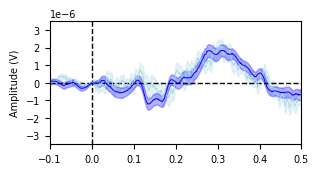

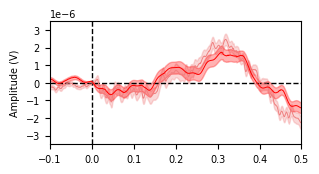

In [ ]:
def convert(lst):
    if len(lst) == 1:
        return f"{lst[0]}"
    else:
        return f"{' '.join(map(str, lst))}"  # or f"'{','.join(map(str, lst))}" for comma-separated

# Combine and process the data
def combine_channels(data, channels):
    combined_data = np.vstack([data[channel-1] for channel in channels])
    return combined_data


def process_data(data, lower_k, upper_k):
    means = []
    std_errors = []
    for i in range(data.shape[1]):
        cleaned_column = fe.rm_outlier(data[:, i], lower_k, upper_k)
        mean = np.mean(cleaned_column)
        std_err = 1.96 * np.std(cleaned_column) / np.sqrt(len(cleaned_column)) # 95% confidence interval
        # std_err =  np.std(cleaned_column) / np.sqrt(len(cleaned_column)) # standard error

        means.append(mean)
        std_errors.append(std_err)
    return np.array(means), np.array(std_errors)

# 3. Update the plot_data function
def plot_data(ep_before, ep_after, rt_before, rt_after, save_name, colors, before_low_k=1.5, before_high_k=1.5, after_low_k=1.5, after_high_k=1.5):
    mean_before, std_err_before = process_data(ep_before, before_low_k, after_high_k)
    mean_after, std_err_after = process_data(ep_after, after_low_k, after_high_k)
    
    line_width = 0.7
    cm = 1/2.54  # centimeters in inches
    fig, ax_line = plt.subplots(figsize=(8*cm, 4*cm))

    ax_line.axvline(0, color='black', linestyle='--', linewidth=1)
    ax_line.axhline(0, color='black', linestyle='--', linewidth=1)

    # Plotting line graph
    ax_line.plot(time, mean_before, color=colors[0], label="Before", linewidth=line_width)
    ax_line.fill_between(time, mean_before-std_err_before, mean_before+std_err_before, color=colors[0], alpha=0.3)
    ax_line.plot(time, mean_after, color=colors[1], label="After", linewidth=line_width)
    ax_line.fill_between(time, mean_after-std_err_after, mean_after+std_err_after, color=colors[1], alpha=0.3)
    # ax_line.plot(time, mean_after-mean_before, color="green", label="Subtract", linewidth=line_width)
    

    ax_line.set_xlim([tmin, tmax])
    ax_line.set_ylim([-3.5*1e-6, 3.5*1e-6])
    ax_line.set_yticks([-3*1e-6, -2*1e-6, -1*1e-6, 0, 1*1e-6, 2*1e-6, 3*1e-6])
    
    ax_line.set_ylabel('Amplitude (V)')
    ax_line.yaxis.get_label().set_position((1, 0.5))  # Adjust these values as needed
    matplotlib.rcParams.update({'font.size': 7})

    # DON'T OVERLAY THE HISTOGRAM AXIS
    # # Overlaying the histogram axis
    # ax_hist = ax_line.twinx()
    # # ax_hist.axis('off')
    # ax_hist.hist(rt_before, bins=25, density=True, histtype='step', edgecolor=colors[0], alpha=1)
    # ax_hist.hist(rt_after, bins=25, density=True, histtype='step', edgecolor=colors[1], alpha=1)
    # ax_hist.set_xlim([tmin, tmax])
    # ax_hist.set_ylim([0, 30])

    # # Customizing the right y-axis
    # ax_hist.yaxis.set_label_position("right")  # Positioning the y-axis label on the right
    # ax_hist.yaxis.tick_right()  # Displaying ticks on the right side of the plot
    # ax_hist.set_ylabel('Frequency')  # Setting the label for the y-axis
    # ax_hist.set_yticks([0, 3, 6, 9])

    # # Move the y-axis label to a lower position
    # # ax_hist.yaxis.get_label().set_verticalalignment('bottom')
    # ax_hist.yaxis.get_label().set_position((1, 0.16))  # Adjust these values as needed


    # Optional: To hide the left y-axis (belonging to ax_line)
    ax_line.yaxis.tick_left()
    ax_line.yaxis.set_label_position("left")
    

    fig.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.9)

    # plt.tight_layout()
    save_path = os.path.join('..', '..', '..', '..', 'paper', 'Figure 3', save_name+'.svg')
    plt.savefig(save_path, format='svg')
    plt.show()

# original pick_channels   
# if case == 'endo valid':
#     pick_channels = [25, 28, 29, 30, 31, 32]
# elif case == 'endo invalid':
#     pick_channels = [8, 11, 13, 14, 15, 19]
# elif case == 'exo valid':
#     pick_channels = [19, 24, 29, 30, 31, 32]
# elif case == 'exo invalid':
#     pick_channels = [14, 24, 29, 30, 31, 32]

pick_channels = [21, 22, 24, 26, 27, 28, 29, 30, 31, 32]
# pick_channels = [23, 24, 25, 28, 29, 30, 31, 32]
# pick_channels = [24, 28, 29]

# region = convert(pick_channels)
# channels = fe.pick_cortex(region)
# picks = list(channels.keys())
# pick_channels = [channels[key] for key in picks]
# time_marks = [0.08, 0.14, 0.27]

colors = ['lightblue', 'blue', 'lightcoral', 'red']
time = np.linspace(tmin, tmax, sham_before[0].shape[1])
fs = 1200  # sampling frequency
outlier = 3  # outlier threshold

# Plotting
combined_sham_before = combine_channels(sham_before, pick_channels)
combined_sham_after = combine_channels(sham_after, pick_channels)
combined_real_before = combine_channels(real_before, pick_channels)
combined_real_after = combine_channels(real_after, pick_channels)

# # pre-sham pre-active
# index_sham = combined_sham_before.shape[0] // 3
# index_real = combined_real_before.shape[0] // 3

# # Create presham by concatenating the top halves
# presham = np.vstack((combined_sham_before[index_sham:, :], combined_real_before[:index_real, :]))
# # presham = presham - 1e-6
# # Create preactive by concatenating the bottom halves
# preactive = np.vstack((combined_sham_before[:index_sham, :], combined_real_before[index_real:, :]))
combined_real_before = combined_real_before - 0.1e-6
combined_real_after = combined_real_after + 0.1e-6


# Call plot_data with additional histogram axes
plot_data(combined_sham_before, combined_sham_after, rt_sham_before, rt_sham_after, case + ' Sham', colors[:2], before_low_k=outlier, before_high_k=outlier, after_low_k=outlier, after_high_k=outlier)
plot_data(combined_real_before, combined_real_after, rt_real_before, rt_real_after, case + ' Real', colors[2:], before_low_k=outlier, before_high_k=outlier, after_low_k=outlier, after_high_k=outlier)

In [ ]:
# def convert(lst):
#     if len(lst) == 1:
#         return f"{lst[0]}"
#     else:
#         return f"{' '.join(map(str, lst))}"  # or f"'{','.join(map(str, lst))}" for comma-separated
    
# if case == 'endo valid':
#     pick_channels = [25, 28, 29, 30, 31, 32]
# elif case == 'endo invalid':
#     pick_channels = [8, 11, 13, 14, 15, 19]
# elif case == 'exo valid':
#     pick_channels = [19, 24, 29, 30, 31, 32]
# elif case == 'exo invalid':
#     pick_channels = [14, 24, 29, 30, 31, 32]

# region = convert(pick_channels)
# # channels = fe.pick_cortex(region)
# # picks = list(channels.keys())
# # pick_channels = [channels[key] for key in picks]
# time_marks = [0.08, 0.14, 0.27]

# colors = ['lightblue', 'blue', 'lightcoral', 'red']
# time = np.linspace(tmin, tmax, sham_before[0].shape[1])
# fs = 1200  # sampling frequency

# # Combine and process the data
# def combine_channels(data, channels):
#     combined_data = np.vstack([data[channel-1] for channel in channels])
#     return combined_data


# def process_data(data, lower_k, upper_k):
#     means = []
#     std_errors = []
#     for i in range(data.shape[1]):
#         cleaned_column = fe.rm_outlier(data[:, i], lower_k, upper_k)
#         mean = np.mean(cleaned_column)
#         std_err = np.std(cleaned_column) / np.sqrt(len(cleaned_column))
#         means.append(mean)
#         std_errors.append(std_err)
#     return np.array(means), np.array(std_errors)

# # 3. Update the plot_data function
# def plot_data(ep_before, ep_after, rt_before, rt_after, save_name, colors, before_low_k=1.5, before_high_k=1.5, after_low_k=1.5, after_high_k=1.5):
#     mean_before, std_err_before = process_data(ep_before, before_low_k, after_high_k)
#     mean_after, std_err_after = process_data(ep_after, after_low_k, after_high_k)
    
#     line_width = 0.7
#     cm = 1/2.54  # centimeters in inches
#     fig, ax_line = plt.subplots(figsize=(9.4*cm, 4*cm))

#     # Plotting line graph
#     ax_line.plot(time, mean_before, color=colors[0], label="Before", linewidth=line_width)
#     ax_line.fill_between(time, mean_before-std_err_before, mean_before+std_err_before, color=colors[0], alpha=0.3)
#     ax_line.plot(time, mean_after, color=colors[1], label="After", linewidth=line_width)
#     ax_line.fill_between(time, mean_after-std_err_after, mean_after+std_err_after, color=colors[1], alpha=0.3)
#     # ax_line.plot(time, mean_after-mean_before, color="green", label="Subtract", linewidth=line_width)
#     ax_line.axvline(0, color='black', linestyle='--', linewidth=1)
#     ax_line.axhline(0, color='black', linestyle='--', linewidth=1)

#     ax_line.set_xlim([tmin, tmax])
#     ax_line.set_ylim([-3.5*1e-6, 4*1e-6])
#     ax_line.set_yticks([-4*1e-6, -2*1e-6, 0, 2*1e-6, 4*1e-6])
    
#     ax_line.set_ylabel('Amplitude (V)')
#     matplotlib.rcParams.update({'font.size': 7})

#     # Overlaying the histogram axis
#     ax_hist = ax_line.twinx()
#     # ax_hist.axis('off') # This line is now commented out

#     # Plotting histograms
#     ax_hist.hist(rt_before, bins=25, density=True, histtype='step', edgecolor=colors[0], alpha=1)
#     ax_hist.hist(rt_after, bins=25, density=True, histtype='step', edgecolor=colors[1], alpha=1)

#     # Setting the limits
#     ax_hist.set_xlim([tmin, tmax])
#     ax_hist.set_ylim([0, 30])

#     # Customizing the right y-axis
#     ax_hist.yaxis.set_label_position("right")  # Positioning the y-axis label on the right
#     ax_hist.yaxis.tick_right()  # Displaying ticks on the right side of the plot
#     ax_hist.set_ylabel('Frequency')  # Setting the label for the y-axis

#     # Optional: To hide the left y-axis (belonging to ax_line)
#     ax_line.yaxis.tick_left()
#     ax_line.yaxis.set_label_position("left")

#     fig.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=0.9)

#     # plt.tight_layout()
#     save_path = os.path.join('..', '..', '..', '..', 'paper', 'Figure 3', save_name+'.svg')
#     # plt.savefig(save_path, format='svg')
#     plt.show()

#     fig, ax_hist = plt.subplots(figsize=(9.4*cm, 4*cm))
#     # Plotting histograms
#     ax_hist.hist(rt_before, bins=25, density=True, histtype='step', edgecolor=colors[0], alpha=1)
#     ax_hist.hist(rt_after, bins=25, density=True, histtype='step', edgecolor=colors[1], alpha=1)

#     # Setting the limits
#     ax_hist.set_xlim([tmin, tmax])
#     ax_hist.set_ylim([0, 30])


# # Plotting
# combined_sham_before = combine_channels(sham_before, pick_channels)
# combined_sham_after = combine_channels(sham_after, pick_channels)
# combined_real_before = combine_channels(real_before, pick_channels)
# combined_real_after = combine_channels(real_after, pick_channels)
# # Call plot_data with additional histogram axes
# plot_data(combined_sham_before, combined_sham_after, rt_sham_before, rt_sham_after, case + ' Sham', colors[:2], before_low_k=1.5, before_high_k=1.5, after_low_k=1.5, after_high_k=1.5)
# plot_data(combined_real_before, combined_real_after, rt_real_before, rt_real_after, case + ' Real', colors[2:], before_low_k=1.5, before_high_k=1.5, after_low_k=1.5, after_high_k=1.5)